## Additional PILLOW functions
Lets take a look at some other functions we might want to use in PILLOW to modify images.

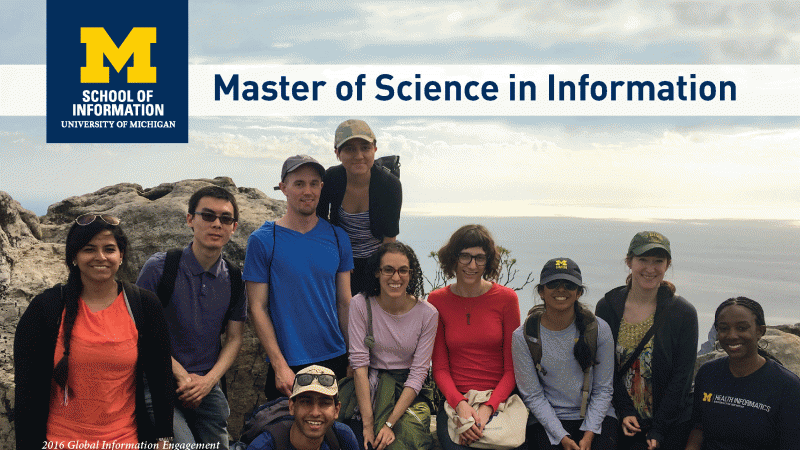

In [1]:
# First, lets import all of the library functions we need
import PIL
from PIL import Image
from IPython.display import display

# And lets load the image we were working, and we can just convert it to RGB inline
file="readonly/msi_recruitment.gif"
image=Image.open(file).convert('RGB')

display(image)

In [2]:
# A task that is fairly common in image and picture manipulation is to create contact sheets of images.
# A contact sheet is one image that actually contains several other different images. Lets try and make
# a contact sheet for the Master of Science in Information advertisment image. In particular, lets change
# the brightness of the image in ten different ways, then scale the image down smaller, and put them side
# by side so we can get the sense of which brightness we might want to use.
#
# First up, lets import the ImageEnhance module, which has a nice object called Brightness
from PIL import ImageEnhance
# Checking the online documentation for this function, it takes a value between 0.0 (a completely black
# image) and 1.0 (the original image) to adjust the brightness. All of the classes in the ImageEnhance module
# do this the same way, you create an object, in this case Brightness, then you call the enhance function()
# on that object with an appropriate parameter.
#
# Lets write a little loop to generate ten images of different brightness. First we need the Brightness
# object with our image
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(0, 10):
    # We'll divide i by ten to get the decimal value we want, and append it to the images list
    # we actually call the brightness routine by calling the enhance() function. Remember, you can dig into
    # details of this using the help() function, or by consulting web docs
    images.append(enhancer.enhance(i/10))
# We can see the result here is a list of ten PIL.Image.Image objects. Jupyter nicely prints out the value
# of python objects nested in lists
print(images)

[<PIL.Image.Image image mode=RGB size=800x450 at 0x1BA964B1E50>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1BA960BD250>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1BA964C1250>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1BA964C11C0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1BA964C11F0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1BA964C1220>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1BA964C12E0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1BA964C1310>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1BA964C1370>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1BA964C13A0>]


In [3]:
# Lets take these images now and composite them, one above another, in a contact sheet.
# There are several different approaches we can use, but I'll simply create a new image which is like
# the first image, but ten times as high. Lets check out the PIL.Image.new functionality
help(PIL.Image.new)


Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



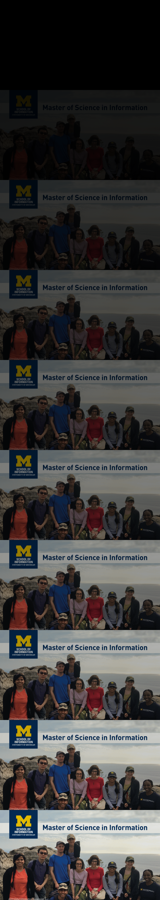

In [4]:
# The new function requires that we pass it a mode. We're going to use the mode 'RGB' which stands for
# Red, Green, and Blue, and is the mode of our current first image. There are lots of different image mode
# formats, and this one is most common.
# For the size we have a tuple, which is the width of the image and the height. We'll use the width of our
# current first image, but for the height we'll multiple this by ten. This will make a sort of "canvas" for
# our contact sheet. Finally, the color is optional, and we'll just leave it at black.
first_image=images[0]
from PIL import Image
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width,10*first_image.height))

# So now we have a black image that's ten times the size of the other images in the contact_sheet
# variable. Now lets just loop through the image list and paste() the results in. The paste() function
# will be called on the contact_sheet object, and takes in a new image to paste, as well as an (x,y)
# offset for that image. In our case, the x position is always 0, but the y location will change by
# 450 pixels each time we iterate through the loop.
#
# Lets first create a counter variable for the y location. It will start at zero
current_location = 0
for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (0, current_location) )
    # And update the current_location counter
    current_location=current_location+450

# This contact sheet has gotten big: 4,500 pixels tall! Lets just resize this sheet for display. We can do
# this using the resize() function. This function just takes a tuple of width and height, and we'll resize
# everything down to the size of just two individual images
contact_sheet = contact_sheet.resize((160,900) )
# Now lets just display that composite image
display(contact_sheet)

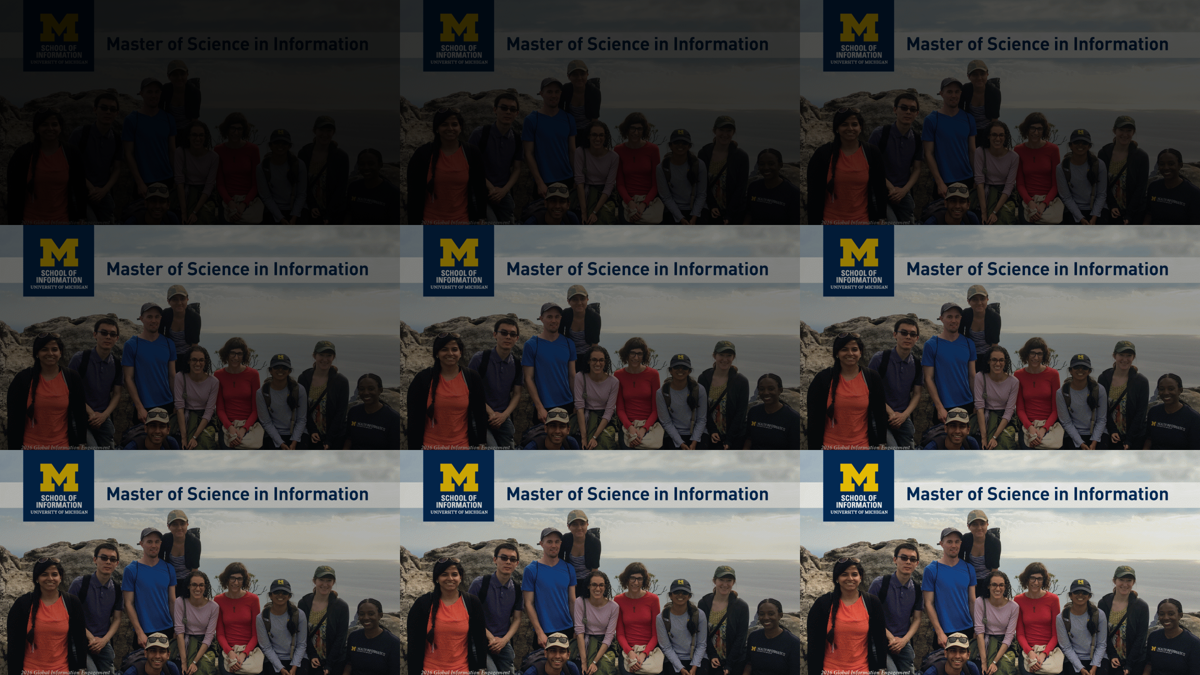

In [5]:
# Ok, that's a nice proof of concept. But it's a little tough to see. Lets instead change this to a three
# by three grid of values. First thing we should do is make our canvas, and we'll make it 3 times the
# width of our image and 3 times the height of our image - a nine image square
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
# Now we want to iterate over our images and place them into this grid. Remember that in PIL we manage the
# location of where we refer to as an image in the upper right hand corner, so this will be 0,0. Lets use
# one variable for the X dimension, and one for the Y dimension.
x=0
y=0

# Now, lets iterate over our images. Except, we don't want to both with the first one, because it is
# just solid black. Instead we want to just deal with the images after the first one, and that should
# give us nine in total
for img in images[1:]:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# Now lets resize the contact sheet. We'll just make it half the size by dividing it by two. And, because
# the resize function needs to take round numbers, we need to convert our divisions from floating point
# numbers into integers using the int() function.
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
# Now lets display that composite image
display(contact_sheet)

Well, that's been a tour of our first external API, the Python Imaging Library, or pillow module. In this series of lectures you've learned how to read and write images, manipulat them with pillow, and explore the functionality of third party APIs using features of Python like dir(), help(), and getmro(). You've also been introduced to the console, and how python stores these libraries on the computer. While for this course all of the libraries are included for you in the Coursera system, and you won't need to install your own, it's good to get a the idea of how this work in case you wanted to set this up on your own.

Finally, while you can explore PILLOW from within python, most good modules also put their documentation up online, and you can read more about PILLOW here: https://pillow.readthedocs.io/en/latest/